In [1]:
import numpy as np


class Perceptron:
    pass
    def __init__(self,learning_rate = 0.1,epochs = 100):
        pass
        self._learning_rate = learning_rate
        self._epochs = epochs

    def _is_misclassification_point(self):
        pass
        """判断是否是误分类点，由子类实现"""
        return NotImplementedError()

    def fit(self,X,y):
        return NotImplementedError

    def predict(self,X_test):
        pass
        y_pred = np.dot(X_test,self._w) + self._b
        return np.sign(y_pred)


class PerceptronOriginal(Perceptron):
    pass
    """原始问题形式的实现"""

    def _is_misclassification_point(self,X,y,i):
        pass
        """判断样本点是否误分类"""
        condition = np.dot(X[i],self._w) +self._b
        return condition*y[i] <=0

    def fit(self,X,y):
        n_samples,n_features = X.shape
        #初始化
        self._w ,self._b = np.random.rand(n_features),0
        lr = self._learning_rate

        #记录每次迭代后错误分类的样本数，初始化为样本数量
        n_errors = n_samples
        for epoch in range(self._epochs):
            print(epoch,n_errors)
            #如果上一轮迭代后没有分类错误的样本点，则不用继续迭代
            if n_errors == 0:
                break
            #每一轮都要初始化
            n_errors = 0
            for i in range(n_samples):
                #如果样本 X[i]是误分类点
                if self._is_misclassification_point(X,y,i):
                    self._w += lr*y[i]*X[i]
                    self._b += lr*y[i]
                    n_errors += 1


class PerceptronDual(Perceptron):
    pass
    """对偶形式的实现"""

    def _calc_Gram(self,X):
        pass
        """计算内积矩阵"""
        return np.dot(X,X.T)

    def _is_misclassification_point(self,Gram,alpha,b,y,i):
        pass
        """判断样本点是否误分类"""
        condition = np.dot(alpha*y,Gram[:,i]) +b
        return condition*y[i] <=0

    def fit(self,X,y):
        n_samples,n_features = X.shape
        #初始化
        alpha ,b = np.zeros(n_samples),0
        lr = self._learning_rate

        #计算内积矩阵
        Gram =  self._calc_Gram(X)
        #记录每次迭代后错误分类的样本数，初始化为样本数量
        n_errors = n_samples
        for epoch in range(self._epochs):
            #print(epoch,n_errors)
            #如果上一轮迭代后没有分类错误的样本点，则不用继续迭代
            if n_errors == 0:
                break
            #每一轮都要初始化
            n_errors = 0
            for i in range(n_samples):
                #如果样本 X[i]是误分类点
                if self._is_misclassification_point(Gram,alpha,b,y,i):
                    alpha[i] = alpha[i]+lr
                    b = b+lr*y[i]
                    n_errors +=1
        #记录训练出来的参数
        self._b = b
        self._w = np.dot(alpha*y,X)



0 75
1 2
2 0
准确率： 100.0 %


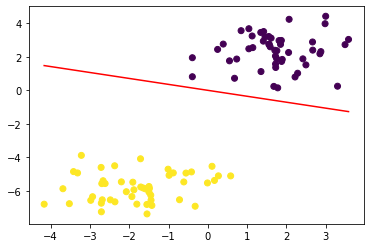

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

X,y = make_blobs(centers=2,n_samples=100)
y[np.argwhere(y!=1)] =-1

X_train, X_test, y_train, y_test = train_test_split(X, y)

p = PerceptronOriginal(learning_rate=0.1)
p.fit(X_train,y_train)
w = p._w
b = p._b
x1 = np.array([np.min(X[:,0]),np.max(X[:,0])])
x2 = (-w[0]*x1 -b)/w[1]

y_pred = p.predict(X_test)
print("准确率：",np.sum( y_pred == y_test)/len(y_test)*100,"%")

plt.scatter(X[:,0],X[:,1],c =y)
plt.plot(x1,x2,'-r')
plt.show()
